# Cirrhosis Patient Survival Prediction
## Group 38
##### EG/2020/4111 - Perera G.A.L.S.
##### EG/2020/4330 - Sheshan K.H.N.

In [996]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

### Import Data

In [997]:
df = pd.read_csv('cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### Data Analysis

In [998]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [999]:
df.drop(['ID'], axis=1, inplace=True)
df.describe(include='all')

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418,312,418.000000,418,312,312,312,418,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
unique,NaN,3,2,NaN,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C,D-penicillamine,NaN,F,N,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,232,158,NaN,374,288,160,222,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1917.782297,NaN,NaN,18533.351675,NaN,NaN,NaN,NaN,NaN,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,NaN,NaN,3815.845055,NaN,NaN,NaN,NaN,NaN,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,NaN,NaN,9598.000000,NaN,NaN,NaN,NaN,NaN,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,NaN,NaN,15644.500000,NaN,NaN,NaN,NaN,NaN,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,NaN,NaN,18628.000000,NaN,NaN,NaN,NaN,NaN,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,NaN,NaN,21272.500000,NaN,NaN,NaN,NaN,NaN,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000


Visualization of the categorical values

Text(0.5, 1.0, 'Countplot of Drug')

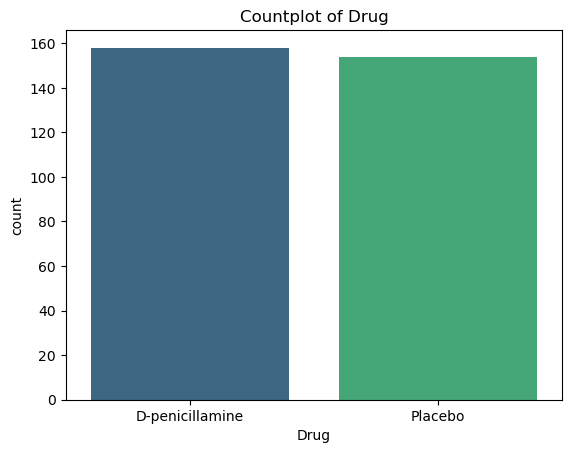

In [1000]:
sns.countplot(x='Drug', data=df, palette='viridis')
plt.title('Countplot of Drug')

Text(0.5, 1.0, 'Countplot of Sex')

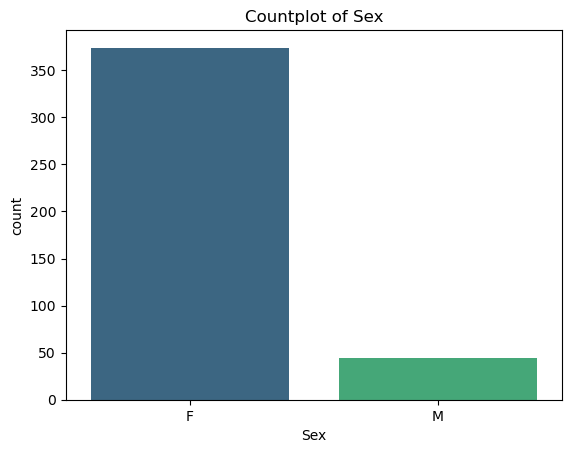

In [1001]:
sns.countplot(x='Sex', data=df, palette='viridis')
plt.title('Countplot of Sex')

Text(0.5, 1.0, 'Countplot of Ascites')

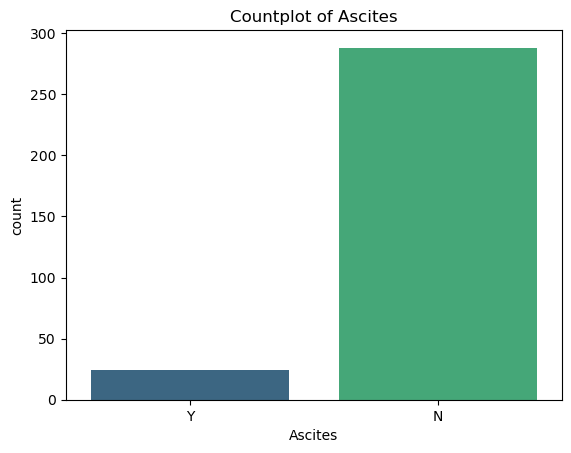

In [1002]:
sns.countplot(x='Ascites', data=df, palette='viridis')
plt.title('Countplot of Ascites')

Text(0.5, 1.0, 'Countplot of Hepatomegaly')

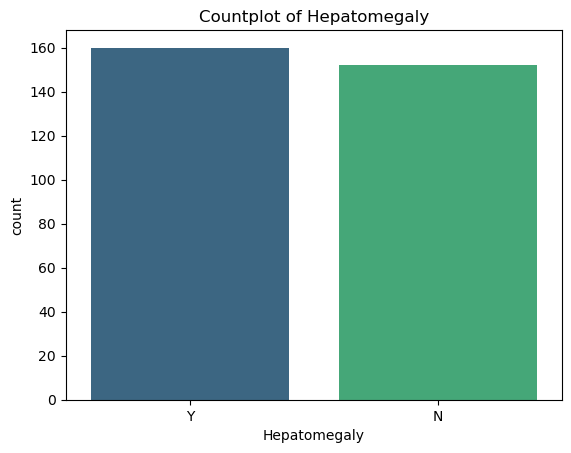

In [1003]:
sns.countplot(x='Hepatomegaly', data=df, palette='viridis')
plt.title('Countplot of Hepatomegaly')

Text(0.5, 1.0, 'Countplot of Spiders')

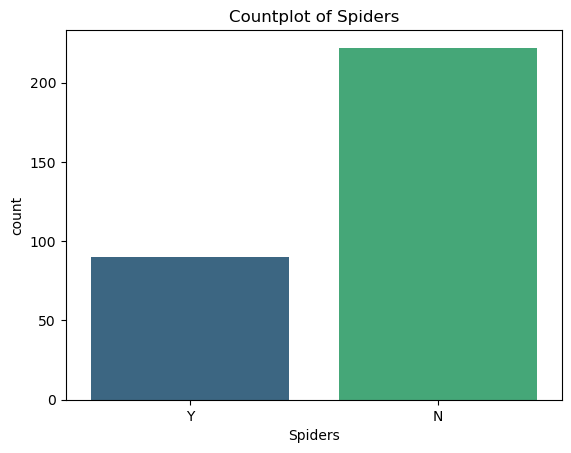

In [1004]:
sns.countplot(x='Spiders', data=df, palette='viridis')
plt.title('Countplot of Spiders')

Text(0.5, 1.0, 'Countplot of Edema')

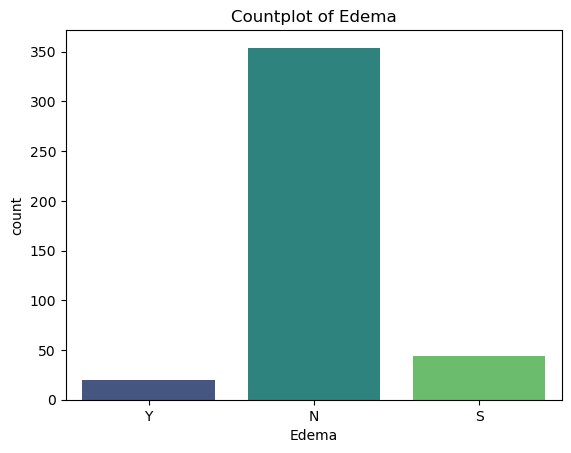

In [1005]:
sns.countplot(x='Edema', data=df, palette='viridis')
plt.title('Countplot of Edema')

Text(0.5, 1.0, 'Countplot of Stage')

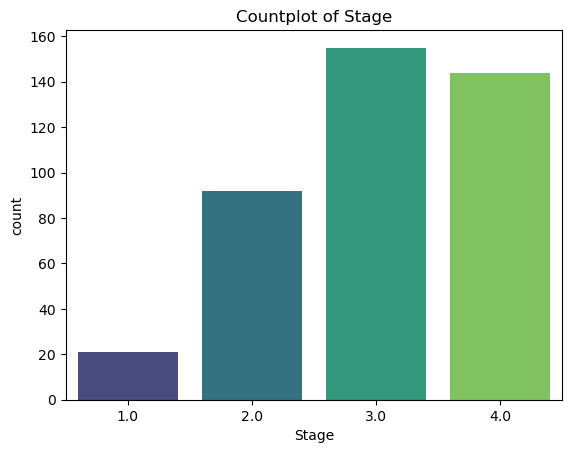

In [1006]:
sns.countplot(x='Stage', data=df, palette='viridis')
plt.title('Countplot of Stage')

Text(0.5, 1.0, 'Countplot of Status')

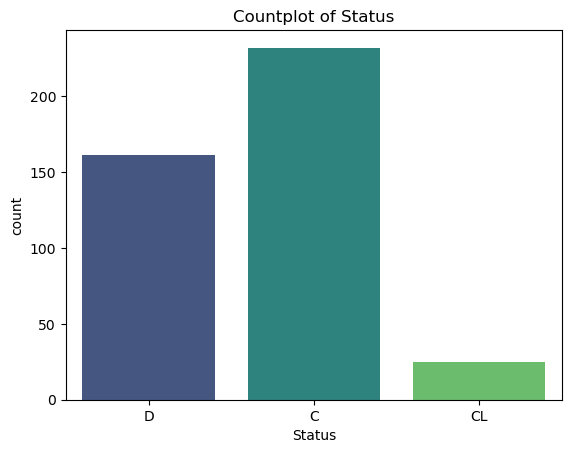

In [1007]:
sns.countplot(x='Status', data=df, palette='viridis')
plt.title('Countplot of Status')

Text(0.5, 1.0, 'Distribution of Status with sex')

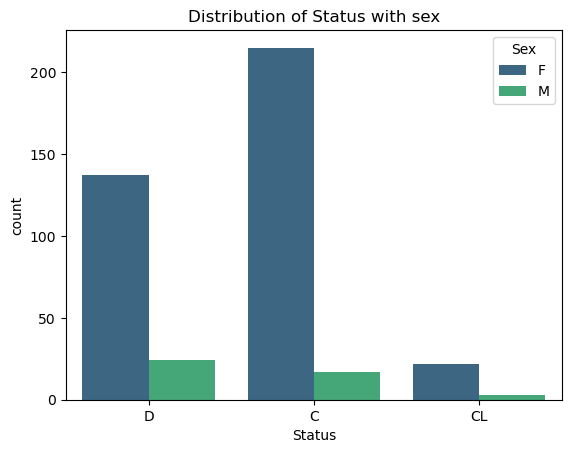

In [1008]:
sns.countplot(x='Status', data=df, palette='viridis', hue='Sex')
plt.title('Distribution of Status with sex')

In [1009]:
# Number of status values
df.Status.value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

Visualization of the numerical values

C:\Users\DELL\AppData\Local\Temp\ipykernel_12140\2045200035.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x="Age", data=df, palette='viridis')


<Axes: xlabel='Age', ylabel='Count'>

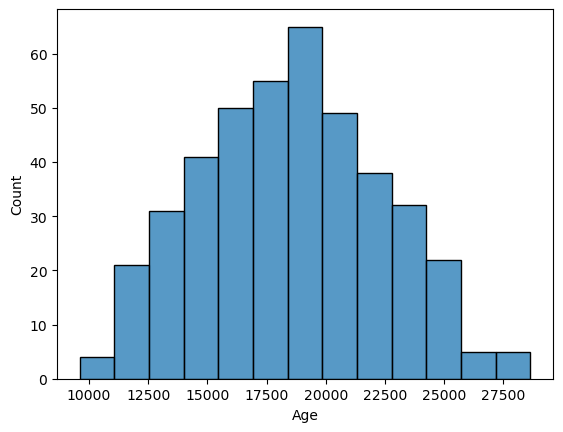

In [1010]:
sns.histplot(x="Age", data=df, palette='viridis')

### Data Preprocessing

In [1011]:
df.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

<Axes: >

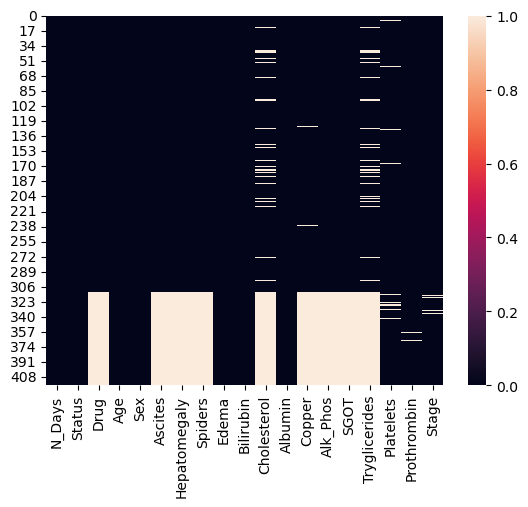

In [1012]:
sns.heatmap(data=df.isnull())

Handling missing numerical values

In [1013]:
num_cols = ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides']

for i in num_cols:
    df[i].fillna(df[i].mean(), inplace=True)

<Axes: >

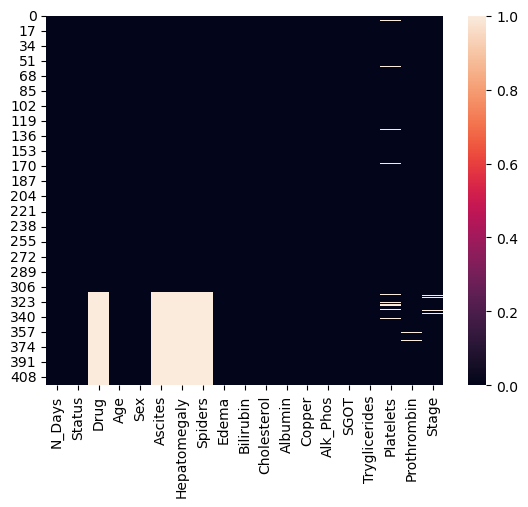

In [1014]:
sns.heatmap(data=df.isnull())

Deleting some missing rows

In [1015]:
remove_row_cols = ['Platelets', 'Prothrombin', 'Stage']

for i in remove_row_cols:
    df = df[pd.notnull(df[i])]

<Axes: >

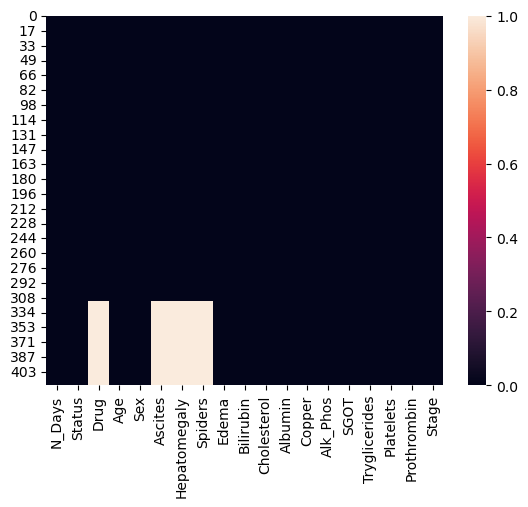

In [1016]:
sns.heatmap(data=df.isnull())

Handling missing categorical values

In [1017]:
missing_categorical_columns = ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Stage']

for i in missing_categorical_columns:
    df[i] = df[i].fillna('Missing')

<Axes: >

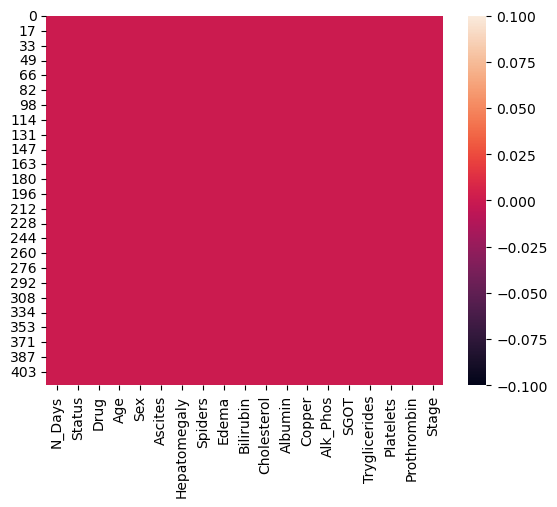

In [1018]:
sns.heatmap(data=df.isnull())

In [1019]:
X = df.drop(['Status'], axis=1)
y = df[['Status']]

Handle Categorical Data using One-Hot-Encoding

In [1020]:
drug = pd.get_dummies(df['Drug'], drop_first=True)
drug.head()

,Missing,Placebo
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [1021]:
label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])
print("Encoded values:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Encoded values: {'C': 0, 'CL': 1, 'D': 2}


In [1022]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
sex.head()

,M
0,False
1,False
2,True
3,False
4,False


In [1023]:
ascites = pd.get_dummies(df['Ascites'],drop_first=True)
ascites = ascites.rename(columns={'N': 'Ascites_N', 'Y': 'Ascites_Y'})
ascites.head()

,Ascites_N,Ascites_Y
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False


In [1024]:
hepatomegaly = pd.get_dummies(df['Hepatomegaly'], drop_first=True)
hepatomegaly = hepatomegaly.rename(columns={'N': 'Hepatomegaly_N', 'Y': 'Hepatomegaly_Y'})
hepatomegaly.head()

,Hepatomegaly_N,Hepatomegaly_Y
0,False,True
1,False,True
2,True,False
3,False,True
4,False,True


In [1025]:
spiders = pd.get_dummies(df['Spiders'], drop_first=True)
spiders = spiders.rename(columns={'N': 'Spiders_N', 'Y': 'Spiders_Y'})
spiders.head()

,Spiders_N,Spiders_Y
0,False,True
1,False,True
2,True,False
3,False,True
4,False,True


In [1026]:
edema = pd.get_dummies(df['Edema'], drop_first=True)
edema = edema.rename(columns={'S': 'Edema_S', 'Y': 'Edema_Y'})
edema.head()

,Edema_S,Edema_Y
0,False,True
1,False,False
2,True,False
3,True,False
4,False,False


Update dataset with the One-Hot-Encoded columns

In [1027]:
df = pd.concat([df,drug,sex,ascites,hepatomegaly,spiders,edema],axis=1)

In [1028]:
df.drop(['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema'], axis=1, inplace=True)

In [1029]:
df.columns

Index(['N_Days', 'Status', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
       'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage', 'Missing', 'Placebo', 'M', 'Ascites_N',
       'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N',
       'Spiders_Y', 'Edema_S', 'Edema_Y'],
      dtype='object')

In [1030]:
X = df.drop(['Status'], axis=1)
y = df[['Status']]

Handle the imbalance of the dataset

In [1031]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [1032]:
y.value_counts()

Status
0         224
1         224
2         224
Name: count, dtype: int64

Feature Selection

    Categorical Values

In [1033]:
categorical_columns = ['Stage', 'Missing', 'Placebo', 'M', 'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N',
                       'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_S', 'Edema_Y']
fs =SelectKBest(score_func=chi2, k=10)
fs.fit(X[categorical_columns],y)

SelectKBest(score_func=<function chi2 at 0x000001804BB23380>)

In [1034]:
fs.scores_

array([11.91807528, 23.70232558,  8.14790997, 14.03960396,  5.15789474,
       88.12765957, 10.79377432, 52.83870968,  7.46153846, 30.02898551,
       22.97435897, 66.16666667])

In [1035]:
mi_score = pd.Series(fs.scores_, index=X[categorical_columns].columns)
mi_score

Stage             11.918075
Missing           23.702326
Placebo            8.147910
M                 14.039604
Ascites_N          5.157895
Ascites_Y         88.127660
Hepatomegaly_N    10.793774
Hepatomegaly_Y    52.838710
Spiders_N          7.461538
Spiders_Y         30.028986
Edema_S           22.974359
Edema_Y           66.166667
dtype: float64

<Axes: >

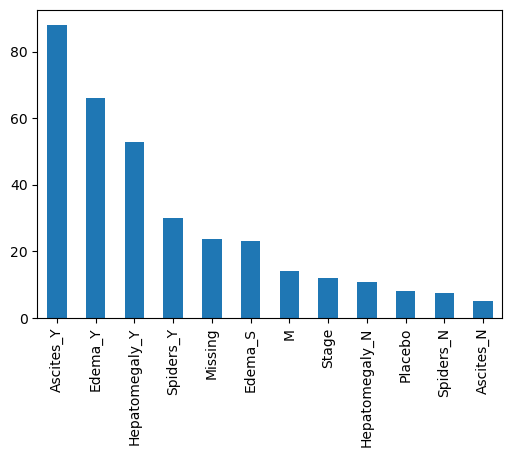

In [1036]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [1037]:
X_selected_categorical = fs.fit_transform(X[categorical_columns], y)
X_selected_categorical = pd.DataFrame(X_selected_categorical)

In [1038]:
X_selected_categorical.head()

,0,1,2,3,4,5,6,7,8,9
0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,3.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [1039]:
X_selected_categorical.shape

(672, 10)

In [1040]:
numerical_columns = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
       'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets','Prothrombin']

In [1041]:
X_selected = pd.concat([X[numerical_columns], X_selected_categorical], axis=1)

In [1042]:
X_selected.columns = X_selected.columns.astype(str)
X_selected

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,0,1,2,3,4,5,6,7,8,9
0,400,21464,14.500000,261.000000,2.600000,156.000000,1718.000000,137.950000,172.000000,190.000000,...,4.000000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1,4500,20617,1.100000,302.000000,4.140000,54.000000,7394.800000,113.520000,88.000000,221.000000,...,3.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1012,25594,1.400000,176.000000,3.480000,210.000000,516.000000,96.100000,55.000000,151.000000,...,4.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1925,19994,1.800000,244.000000,2.540000,64.000000,6121.800000,60.630000,92.000000,183.000000,...,4.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1504,13918,3.400000,279.000000,3.530000,143.000000,671.000000,113.150000,72.000000,136.000000,...,3.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,216,21257,5.665357,364.080871,2.248514,230.097007,656.892866,135.147613,127.068836,205.199386,...,4.000000,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
668,699,16917,3.019990,341.706145,2.784001,150.989402,1907.192939,125.613829,114.421205,259.000277,...,4.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
669,374,18431,2.380375,182.018733,3.269255,109.635152,957.787216,154.579664,113.962535,115.383141,...,4.000000,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
670,2751,22920,3.739839,351.314818,3.897911,16.646249,688.297424,116.808371,137.025173,203.198804,...,4.000000,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


Splitting the data

In [1043]:
X_train, X_test, y_train,y_test = train_test_split(X_selected, y, test_size=0.2, random_state=11)

In [1044]:
X_train

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,0,1,2,3,4,5,6,7,8,9
306,839,13879,2.000000,247.000000,3.160000,69.000000,1050.000000,117.000000,88.000000,335.000000,...,2.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276,41,24064,17.900000,175.000000,2.100000,220.000000,705.000000,338.000000,229.000000,62.000000,...,4.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
510,927,19742,1.442447,320.827511,3.337870,98.859719,1549.628101,98.059740,107.341926,223.788502,...,3.515107,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
447,2137,17894,16.998825,363.104057,3.131505,98.655119,1837.791544,121.958187,137.329626,417.574464,...,2.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
262,179,25899,6.600000,222.000000,2.330000,138.000000,620.000000,106.000000,91.000000,195.000000,...,4.000000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,662,17532,2.100000,369.510563,4.100000,97.648387,1982.655769,122.556346,124.702128,200.000000,...,3.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269,1447,17525,1.600000,369.510563,3.070000,136.000000,1995.000000,128.000000,124.702128,372.000000,...,4.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
337,2338,14245,1.600000,369.510563,3.750000,97.648387,1982.655769,122.556346,124.702128,145.000000,...,3.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,750,19693,3.200000,201.000000,3.110000,178.000000,1212.000000,159.650000,69.000000,188.000000,...,4.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


Scaling the data

In [1045]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.loc[:,numerical_columns])
X_test_scaled = scaler.transform(X_test.loc[:,numerical_columns])

## Decision Tree

In [1046]:
dtree_model = DecisionTreeClassifier(random_state=11)
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

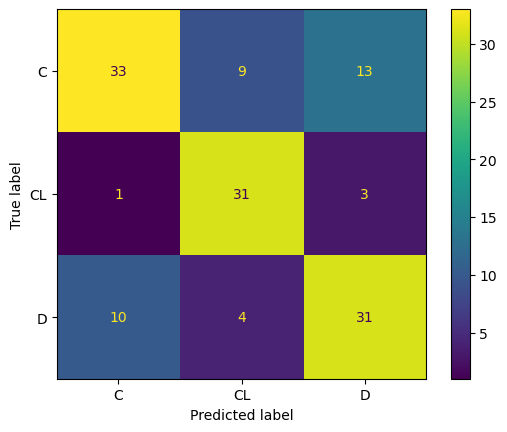

In [1047]:
ConfusionMatrixDisplay.from_estimator(
    dtree_model, X_test, y_test,
    display_labels=["C", "CL", "D"])
plt.show()

In [1048]:
y_pred_dtree = dtree_model.predict(X_test)

In [1049]:
print(accuracy_score(y_test, y_pred_dtree)*100,"%")

70.37037037037037 %


In [1050]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        55
           1       0.70      0.89      0.78        35
           2       0.66      0.69      0.67        45

    accuracy                           0.70       135
   macro avg       0.70      0.72      0.71       135
weighted avg       0.71      0.70      0.70       135



## SVM

In [1051]:
svm_model = SVC(random_state=11)
svm_model.fit(X_train_scaled, y_train)

d:\Program Files\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=11)

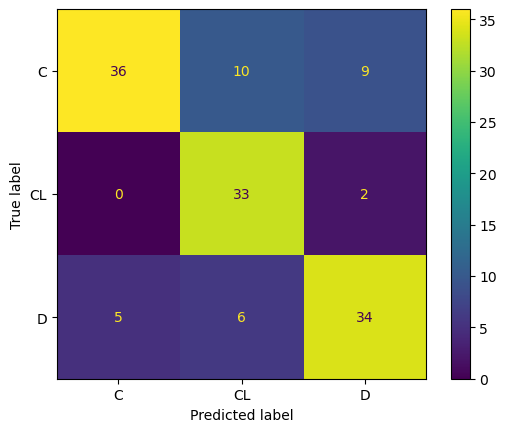

In [1052]:
ConfusionMatrixDisplay.from_estimator(
    svm_model, X_test_scaled, y_test,
    display_labels=["C", "CL", "D"])
plt.show()

In [1053]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [1054]:
print(accuracy_score(y_test, y_pred_svm)*100,"%")

76.29629629629629 %


In [1055]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        55
           1       0.67      0.94      0.79        35
           2       0.76      0.76      0.76        45

    accuracy                           0.76       135
   macro avg       0.77      0.78      0.76       135
weighted avg       0.78      0.76      0.76       135



# Post Processing

## Grid Search

For Decision Trees

In [1056]:
dtree_classifier = DecisionTreeClassifier(random_state=11)

In [1057]:
param_grid = {
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
}

grid_search_tree = GridSearchCV(estimator=dtree_classifier,param_grid=param_grid, verbose=0, cv=5)

In [1058]:
grid_search_tree.fit(X_train, y_train)

d:\Program Files\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Program Files\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Program Files\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "d:\Program Files\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "d:\Program Files\anaconda3\Lib\site

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3]})

In [1059]:
# Print the mean cross-validated score of the best_estimator
print("Mean Cross-validated Score of the Best Estimator:", grid_search_tree.best_score_)

Mean Cross-validated Score of the Best Estimator: 0.7373658705434407


In [1060]:
# Print best hyperparameters detected from the Grid Search
print("Best Hyperparameters:", grid_search_tree.best_params_)

Best Hyperparameters: {'min_samples_leaf': 1, 'min_samples_split': 2}


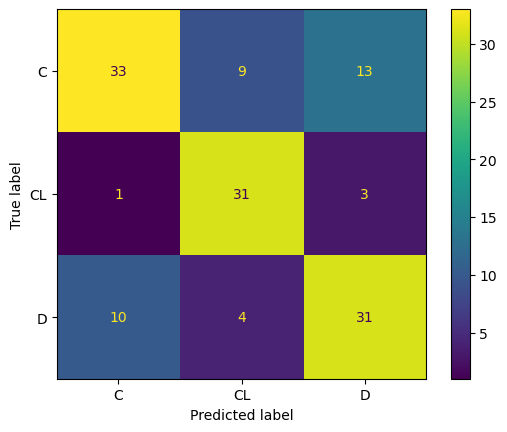

In [1061]:
ConfusionMatrixDisplay.from_estimator(
    grid_search_tree, X_test, y_test,
    display_labels=["C", "CL", "D"])
plt.show()

In [1062]:
# Use best estimator to obtain the accuracy for the test set
test_accuracy = grid_search_tree.best_estimator_.score(X_test, y_test)

# Print the accuracy on the test set
print("Test Set Accuracy: ", test_accuracy*100,"%")

Test Set Accuracy:  70.37037037037037 %


In [1063]:
y_pred_grid_tree = grid_search_tree.predict(X_test)

In [1064]:
print(classification_report(y_test, y_pred_grid_tree))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        55
           1       0.70      0.89      0.78        35
           2       0.66      0.69      0.67        45

    accuracy                           0.70       135
   macro avg       0.70      0.72      0.71       135
weighted avg       0.71      0.70      0.70       135



For SVM

In [1065]:
svm_classifier = SVC(random_state=11)

In [1066]:
param_grid_svm = {
    'C': [0.825,0.85,0.875,1.0],
    'kernel': ['linear', 'poly','rbf'],
    'degree': [2, 3, 4],
    'coef0': [0.17, 0.18, 0.20],
    'gamma': ['scale', 'auto', 1.0, 0.1],
    'decision_function_shape':['ovo', 'ovr']
}

grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, verbose=0,cv=5, n_jobs=-1)

In [1067]:
grid_search_svm.fit(X_train_scaled, y_train)

d:\Program Files\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(random_state=11), n_jobs=-1,
             param_grid={'C': [0.825, 0.85, 0.875, 1.0],
                         'coef0': [0.17, 0.18, 0.2],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 1.0, 0.1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [1068]:
# Print best hyperparameters detected from the Grid Search
print("Best Hyperparameters:", grid_search_svm.best_params_)

Best Hyperparameters: {'C': 1.0, 'coef0': 0.17, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 1.0, 'kernel': 'rbf'}


In [1069]:
# Print the mean cross-validated score of the best_estimator
print("Mean Cross-validated Score of the Best Estimator:", grid_search_svm.best_score_)

Mean Cross-validated Score of the Best Estimator: 0.7912253374870197


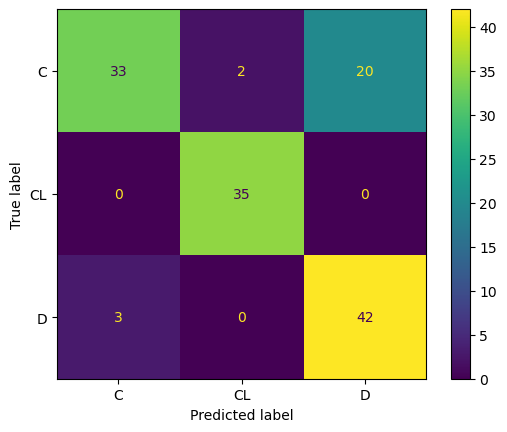

In [1070]:
ConfusionMatrixDisplay.from_estimator(
    grid_search_svm, X_test_scaled, y_test,
    display_labels=["C", "CL", "D"])
plt.show()

In [1071]:
# Use best estimator to obtain the accuracy for the test set
test_accuracy = grid_search_svm.best_estimator_.score(X_test_scaled, y_test)

# Print the accuracy on the test set
print("Test Set Accuracy: ", test_accuracy*100,"%")

Test Set Accuracy:  81.48148148148148 %


In [1072]:
y_pred_grid_svm = grid_search_svm.predict(X_test_scaled)

In [1073]:
print(classification_report(y_test, y_pred_grid_svm))

              precision    recall  f1-score   support

           0       0.92      0.60      0.73        55
           1       0.95      1.00      0.97        35
           2       0.68      0.93      0.79        45

    accuracy                           0.81       135
   macro avg       0.85      0.84      0.83       135
weighted avg       0.84      0.81      0.81       135

